This is a notebook that for a generalised script that reads Survey Data and produces Institutional Informal Rules

This analysis requires two csv files:
1. Survey overview file with the following content: 

	Columns: 
	- Question identifier (“Question_ID”)
	- Question text (“Question_Text”)
	- Response option text (“Response_Option”)
	- Response option numerical mapping (“Response_Value”)
	- What ADICO Component this question identifies (Attibute, Aim, Condition, Deontic) (“ADICO_Category”)

	Rows: 
	- a row for each response option. 
	- if a question can be answered with any integer between one and five then that question takes up five rows.

2. Survey Responses file with the following content

	Columns: 
	- the questions identified by their matching "Question_ID"

	Rows: 
	- the responses identified by a "Response_ID" 
	


In [7]:
#Import Required Packages for the process
import pandas as pd

Loading the Survey Data:

In [48]:
#Change these locations to your Overview and Responses csv files:
Survey_Overview_Location = "..\Generate mock survey\Mock_Survey_Overview.csv"
Survey_Responses_Location = "..\Generate mock survey\mock_survey_responses.csv"

#Reads the files into a table
Survey_Overview = pd.read_csv(Survey_Overview_Location)
Survey_Responses = pd.read_csv(Survey_Responses_Location).set_index('Response_ID')

Survey_Overview["Question_Response_ID"] = Survey_Overview["Question_ID"].astype(str) + "_" + Survey_Overview["Response_Value"].astype(str)
Survey_Overview.set_index('Question_Response_ID', inplace=True)

In [49]:
display(Survey_Overview)

,Question_ID,Question_Text,Response_Option,Response_Value,ADICO_Category
Question_Response_ID,,,,,
Q1_1,Q1,What is your age?,Under 18,1,Attribute
Q1_2,Q1,What is your age?,18-35,2,Attribute
Q1_3,Q1,What is your age?,36-50,3,Attribute
Q1_4,Q1,What is your age?,51-65,4,Attribute
Q1_5,Q1,What is your age?,Over 65,5,Attribute
Q2_1,Q2,What is your gender?,Male,1,Attribute
Q2_2,Q2,What is your gender?,Female,2,Attribute
Q2_3,Q2,What is your gender?,Other,3,Attribute
Q3_1,Q3,Have you recycled in the past month?,Yes,1,Aim


In [50]:
display(Survey_Responses)

,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10
Response_ID,,,,,,,,,,
1,5,3,2,2,2,1,2,1,2,1
2,3,1,1,1,1,1,4,2,1,1
3,1,3,1,2,1,1,1,2,1,1
4,1,1,2,2,1,2,4,1,1,2
5,4,1,2,2,2,1,1,2,2,1
...,...,...,...,...,...,...,...,...,...,...
96,1,3,1,1,1,2,2,2,2,1
97,1,3,2,1,2,1,5,2,2,2
98,1,2,1,2,2,2,1,2,2,2


Categorising and Selecting Questions 

In [51]:
#Make lists of questions that have been categorized into each ADICO component:
attributes = Survey_Overview[Survey_Overview['ADICO_Category'] == "Attribute"]["Question_ID"].unique()
aims = Survey_Overview[Survey_Overview['ADICO_Category'] == "Aim"]["Question_ID"].unique()
conditions  = Survey_Overview[Survey_Overview['ADICO_Category'] == "Condition"]["Question_ID"].unique()
deontics = Survey_Overview[Survey_Overview['ADICO_Category'] == "Deontic"]["Question_ID"].unique()

#Alternatively you can make manual lists of the questions if you wish to select a subset or if the questions have not been categorised with ADICO_Category:
aims = ['Q3', 'Q4', 'Q5']
conditions = ['Q1', 'Q2', 'Q6', 'Q7', 'Q8'] #Added attribute questions to conditions
deontics = ['Q9', 'Q10']

Preprocessing and Codifying responses:

In [58]:
adjusted_responses = Survey_Responses.copy().dropna(axis=1)
adjusted_overview = Survey_Overview.copy().dropna(axis=1)

#Prepare responses to be binary outcomes
adjusted_responses.loc[adjusted_responses["Q1"] >= 4, "Q1"] = 4 #sets all responses of age over 50 to 4
adjusted_responses.loc[adjusted_responses["Q1"] <= 3, "Q1"] = 3 #sets all responses of age under 50 to 3
adjusted_overview.loc[(adjusted_overview["Question_ID"] == "Q1") & (adjusted_overview["Response_Value"] == 4), "Response_Option"] = "Over 50" #changes the text of the response for age option 4 to "Over 50"  
adjusted_overview.loc[(adjusted_overview["Question_ID"] == "Q1") & (adjusted_overview["Response_Value"] == 3), "Response_Option"] = "50 or younger" #changes the text of the response for age option 3 to "50 or younger"

adjusted_responses.loc[adjusted_responses["Q7"] >= 4, "Q7"] = 4 #sets all responses that consider public transport price expensive to 4
adjusted_responses.loc[adjusted_responses["Q7"] <= 3, "Q7"] = 3 #sets all responses that do not consider public transport price expensive to 3
adjusted_overview.loc[(adjusted_overview["Question_ID"] == "Q7") & (adjusted_overview["Response_Value"] == 4), "Response_Option"] = "Expensive"
adjusted_overview.loc[(adjusted_overview["Question_ID"] == "Q7") & (adjusted_overview["Response_Value"] == 3), "Response_Option"] = "not Expensive"

#Remove responses that might not be relevant: 
#Note: this is just an example on how to filter for a subset of the responses, ignoring "other" as a gender may be ethically problematic and misrepresent true patterns of behaviour
adjusted_responses = adjusted_responses[adjusted_responses["Q2"] != 3] #This removes all "other" responses to the question on gender

#create a column that will later be rewritten as its respective IG syntax component, for now it will be the question and response option combined
adjusted_overview['IG_Component'] = adjusted_overview['Question_Text'].astype(str) + " Response: " + adjusted_overview['Response_Option'].astype(str)

Rewriting responses as their respective Adico component (Optional): 

In [59]:
from langchain_core.prompts import ChatPromptTemplate
from langchain_groq import ChatGroq
import json
import sys
# Add the parent directory to the path
sys.path.append('..')
# Now you can import the private values defined in config
from config import groqkey #API keys should always be kept in a separate config file that you never share
#Currently you can request an API from Groq and make api calls for free!

In [64]:
#Ask Generative AI to rewrite the Json Approach
#groq offers these models:
models = ["gemma-7b-it", "llama3-8b-8192", "mixtral-8x7b-32768", "llama3-70b-8192"]
# Define the LLM, models[1] represents "llama3-8b-8192"
llm = ChatGroq(temperature=0, model=models[1], api_key=groqkey)

#if you prefer to use openAI:
# models = ["gpt-3.5-turbo-0125", "gpt-4o"]
# llm = ChatOpenAI(temperature=0, model=models[1], api_key=OPENAI_Key)

#You can experiment with the system instructions given to the ai, this section was excluded because I considered it redundant but it can always be added
"""Here is an example: "Attribute": "People", "Aim":"do this specific action", "Condition1": "if this condition is met", "Condition2": "and this condition is met" 
 I should be able to combine any output Attribute + Aim + Condition to form a full 3rd-person sentence that describes behaviour. """

#Function that gets the response from the LLM model and reads it into a table, the function takes a dataframe table of the survey overview, 
# preferably provide it with a subset of the survey overview of Aims, Conditions or Attributes and indicate this in the ADICO_component value.
def ExampleCompletionFunction(questions, ADICO_component):
    #create an empty table with the output column:
    IG_components = pd.DataFrame(columns=["IG_Component"])
    
    #Handle each question separetly to avoid confusion:
    for question in questions['Question_ID'].unique():

        # Prepares the provided overview table for the LLM 
        questionset = questions[questions['Question_ID'] == question][["Question_Text","Response_Option"]]
        request = questionset.to_json(orient='index', index=True)        

        #The general instructions for the LLM
        system = f"""You are a json interpreter that transforms survey questions and responses into structured informal rule institutional statement components in 3rd person.
                    The input json will have the following structure:
                    Object Key = identifier of question and answer pair
                    With nested values
                    Question_Text: Text of the question being asked
                    Response_Option = a response option for the question    

                    You output json must have the following structure:
                    Object Key = the same identifier of question and answer pair
                    IG_Component = The rewritten question and answer 

                    Be concise but do not simplify or generalise the actions and conditions.  
                    If a response option is just a number, relate it to the other options for that question 
                    Always produce a single JSON containing the same (number of) question identifies  as have been provided.

                    In this instance the questions you have been provided are '{ADICO_component}'. Perform the text conversion below.
                    """     
        #Additional information for the LLM that depends on the "ADICO_component" given:
        system +=   {'Attributes':'demographic of the survey responses, should be written as "People (rewritten question and answer)" e.g. "People who are male"', #if "ADICO_component" is Attributes
                    'Aims': "action question and the response, should be written as an action that precedes the subject of the sentence  e.g. 'sell their house', do not include the subject of the sentence", #if "ADICO_component" is Aims
                    'Conditions': "condition question and response, should be rewritten as 'if (rewritten question and answer)' in 3rd person ('they') e.g. 'if they feel they cannot rely on government support'"}[ADICO_component] #if "ADICO_component" is Conditions 

        #Combines and formats the message and system instructions for the LLM  
        human = "{text}"
        prompt  = ChatPromptTemplate.from_messages([("system", system), ("human", human)])

        #Sends the request to the LLM to get a response
        chain = prompt | llm
        response = chain.invoke({"text": request})

        # Extract the JSON string from the LLM response text
        start = response.content.find("{")
        end = response.content.rfind("}") + 1
        json_str = response.content[start:end]

        # Parse the JSON string into a Python dictionary
        try:
            data_dict = json.loads(json_str)        
        except: 
            # Replace all instances of "}}" with "}", and remove any incorrect json formatting
            json_str = json_str.replace("}}", "}")+"}"
            json_str = json_str.replace(",\n{", ",\n")
            json_str = json_str.replace(",{", ",")

            # Load the JSON string into a dictionary
            data_dict = json.loads(json_str)
        
        # Read the processed response as a dataframe
        IG_components = pd.concat([IG_components, pd.DataFrame.from_dict(data_dict, orient='index')])
        
    return IG_components



# Update adjusted_overview with values from the LLM's response
adjusted_overview.update(ExampleCompletionFunction(adjusted_overview[adjusted_overview['Question_ID'].isin(aims)], "Aims"))
adjusted_overview.update(ExampleCompletionFunction(adjusted_overview[adjusted_overview['Question_ID'].isin(attributes)], "Attributes"))
adjusted_overview.update(ExampleCompletionFunction(adjusted_overview[adjusted_overview['Question_ID'].isin(conditions)], "Conditions"))

# for now we treat deontic example questions as Conditions as deontics have not yet been integrated in the final method
adjusted_overview.update(ExampleCompletionFunction(adjusted_overview[adjusted_overview['Question_ID'].isin(deontics)], "Conditions")) 

In [66]:
adjusted_overview

,Question_ID,Question_Text,Response_Option,Response_Value,ADICO_Category,IG_Component
Question_Response_ID,,,,,,
Q1_1,Q1,What is your age?,Under 18,1,Attribute,if they are under 18
Q1_2,Q1,What is your age?,18-35,2,Attribute,if they are between 18 and 35
Q1_3,Q1,What is your age?,50 or younger,3,Attribute,if they are 50 or younger
Q1_4,Q1,What is your age?,Over 50,4,Attribute,if they are over 50
Q1_5,Q1,What is your age?,Over 65,5,Attribute,if they are over 65
Q2_1,Q2,What is your gender?,Male,1,Attribute,if they are male
Q2_2,Q2,What is your gender?,Female,2,Attribute,if they are female
Q2_3,Q2,What is your gender?,Other,3,Attribute,if they are other
Q3_1,Q3,Have you recycled in the past month?,Yes,1,Aim,recycle


Parallel set diagrams

In [67]:
import plotly.express as px

In [80]:
# Select which aim and condition questions you would like to visualize in the Parallel set diagram
aim = "Q4"
conditions = ["Q1", "Q7", "Q10"]
questions = [aim] + conditions

paralelsetdf = adjusted_responses[questions].astype(str)

# Define custom color mapping
color_mapping = {
    "1": "#00a6d6",
    "2": "#a7a7a7"
}

# Apply color mapping
paralelsetdf['color'] = paralelsetdf[aim].map(color_mapping)

# Update labels to provide the need
aimcounts = paralelsetdf[aim].value_counts()
paralelsetdf.loc[paralelsetdf[aim] == str(1), aim] = f"Does ({aimcounts.loc[str(1)]})"
paralelsetdf.loc[paralelsetdf[aim] == str(2), aim] = f"Does not ({aimcounts.loc[str(2)]})"

for condition in conditions:
    conditioncounts = paralelsetdf[condition].value_counts()
    for val in paralelsetdf[condition].unique():
        paralelsetdf.loc[paralelsetdf[condition] == val, condition] = adjusted_overview.loc[(adjusted_overview['Question_ID'] == condition) & (adjusted_overview['Response_Value'] == float(val)), "Response_Option"].iloc[0] + f" ({conditioncounts.loc[val]})"


diagram_headers = questions
diagram_headers = ["Frequent use?", "Age?", "Percieved Price", "Peer pressure to use?"]
paralelsetdf.columns = diagram_headers + ["color"]

# Create the parallel categories plot
fig = px.parallel_categories(
    paralelsetdf,
    dimensions=diagram_headers,
    color='color',
)

# Update the layout of the figure with a title and font size
fig.update_layout(title_text="People: " + adjusted_overview[adjusted_overview['Question_ID'] == aim]["Question_Text"].iloc[0], 
                    height=500,
                    width=1050,
                    title_font=dict(size=30),  # Set title font size here
                    font=dict(size=17)  # Set default font size here (for labels, etc.)
)

# Show the plot
fig.show()


In [76]:
paralelsetdf

,Frequent use?,Age?,Percieved Price,Peer pressure to use?,color
Response_ID,,,,,
2,Does (35),50 or younger (40),Expensive (22),Yes (29),NaN
4,Does not (26),50 or younger (40),Expensive (22),No (32),NaN
5,Does not (26),Over 50 (21),not Expensive (39),Yes (29),NaN
6,Does (35),50 or younger (40),not Expensive (39),No (32),NaN
8,Does (35),Over 50 (21),not Expensive (39),No (32),NaN
...,...,...,...,...,...
91,Does (35),50 or younger (40),not Expensive (39),Yes (29),NaN
92,Does (35),Over 50 (21),Expensive (22),No (32),NaN
94,Does (35),Over 50 (21),Expensive (22),No (32),NaN


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
from langchain_core.prompts import ChatPromptTemplate
from langchain_groq import ChatGroq

import sys
# Add the parent directory to the path
sys.path.append('..')

# Now you can import the config module
from config import groqkey

Processing aim: Question 3: Have you recycled in the past month?


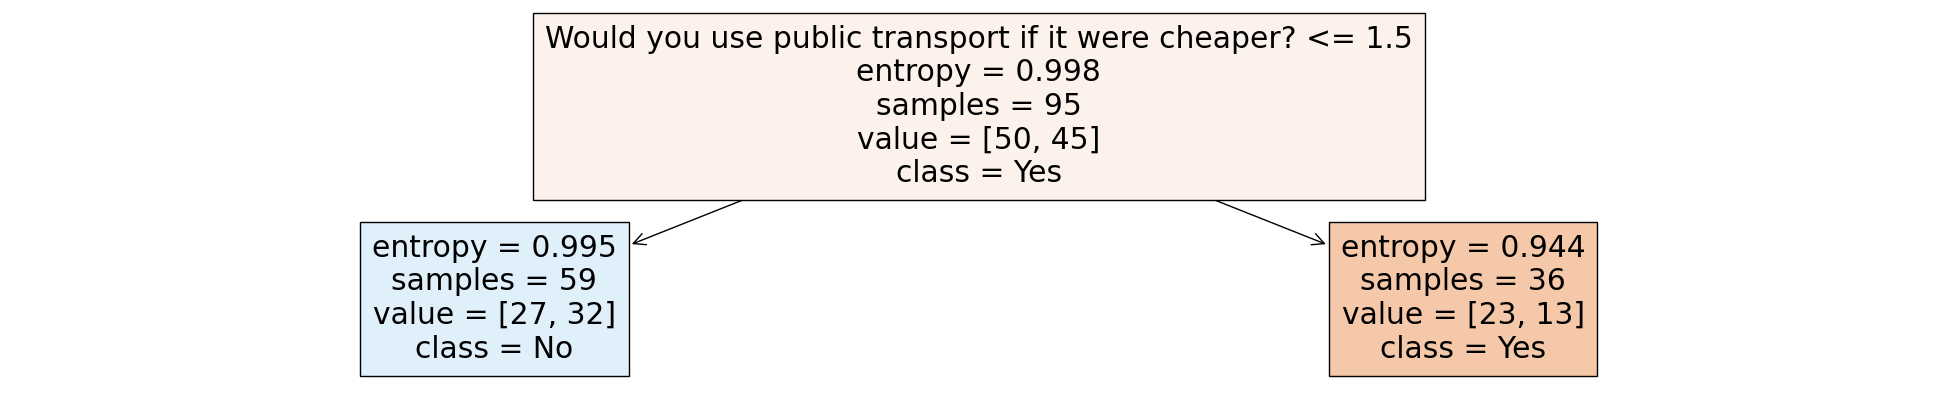

,Aim,Aim_resp,filter1,Condition,Condition_resp,Threshold,filter2
0,3,Yes,50.0,7,No,1.5,23.0


Processing aim: Question 3: Have you recycled in the past month?


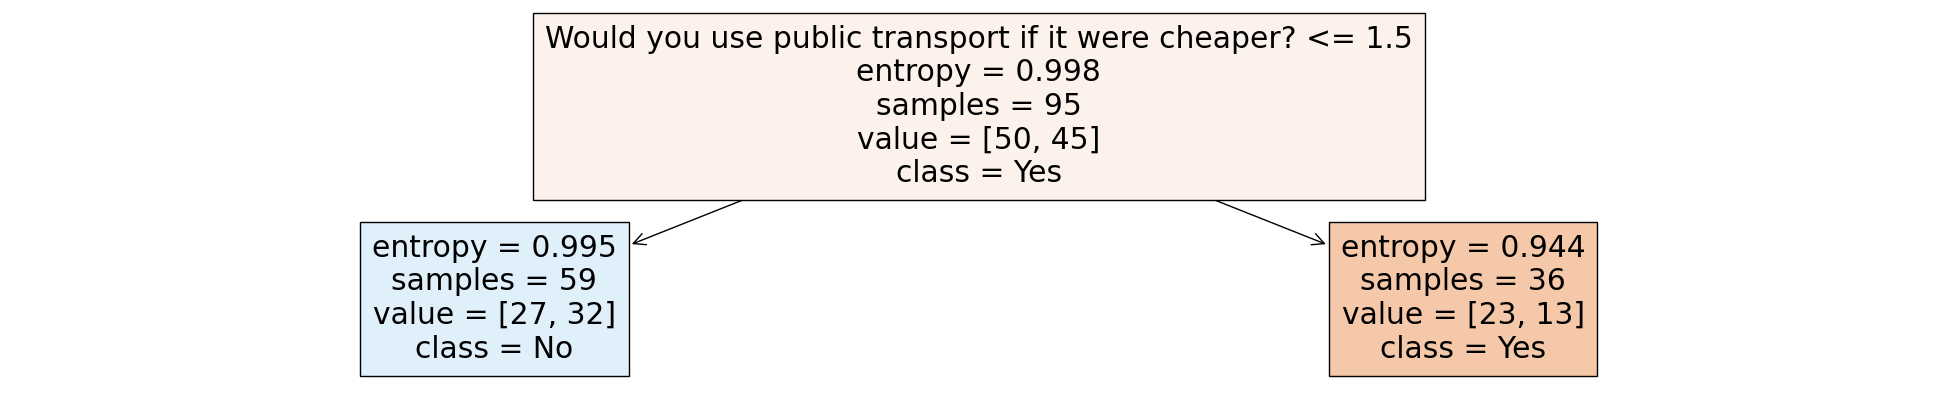

,Aim,Aim_resp,filter1,Condition,Condition_resp,Threshold,filter2
0,3,Yes,50.0,7,No,1.5,23.0


Processing aim: Question 3: Have you recycled in the past month?


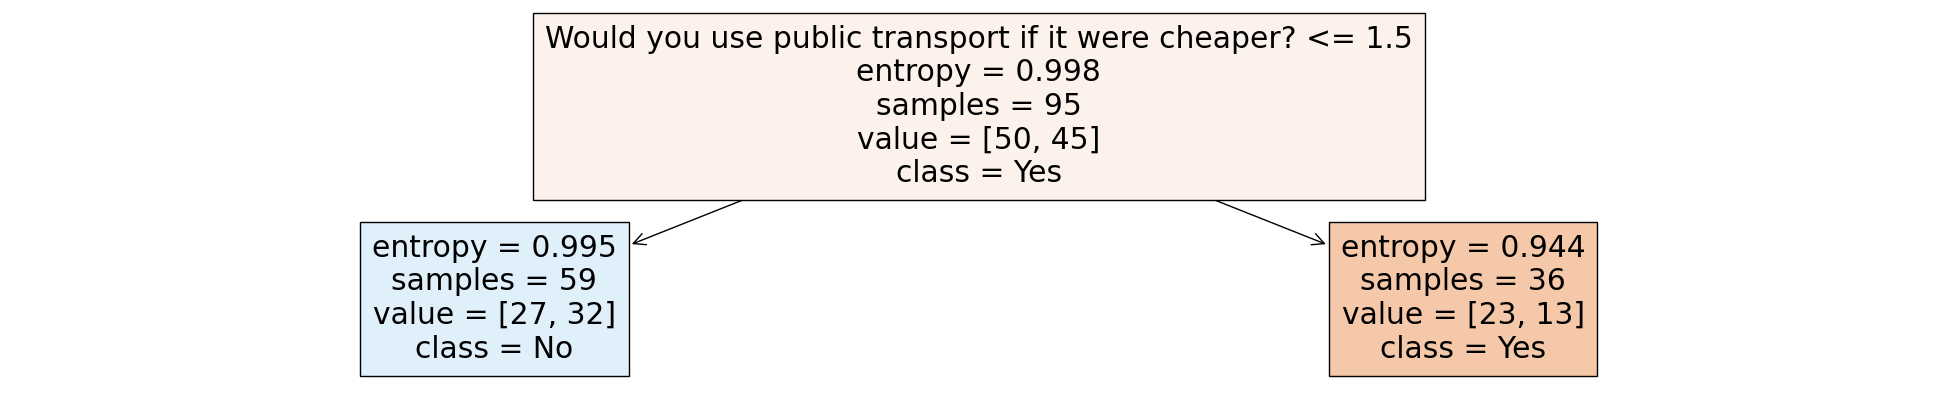

,Aim,Aim_resp,filter1,Condition,Condition_resp,Threshold,filter2
0,3,Yes,50.0,7,No,1.5,23.0


Processing aim: Question 4: Do you plan to use public transportation more frequently?


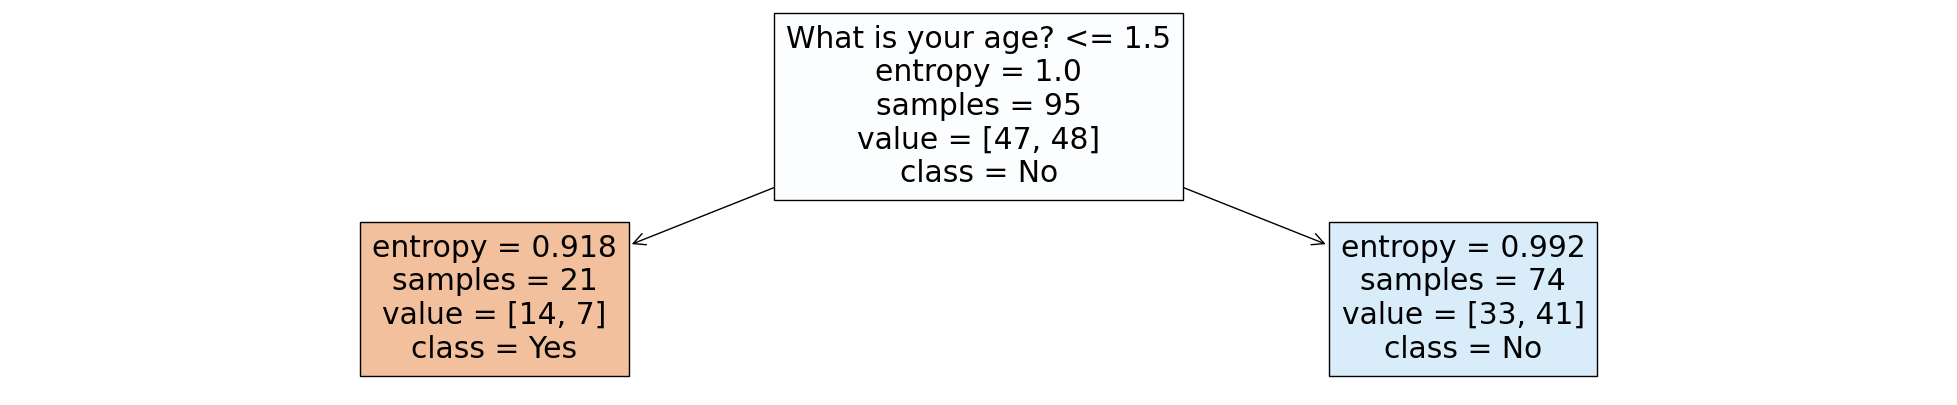

,Aim,Aim_resp,filter1,Condition,Condition_resp,Threshold,filter2
0,3,Yes,50.0,7,No,1.5,23.0
1,4,Yes,48.0,1,Under 18,1.5,14.0


Processing aim: Question 4: Do you plan to use public transportation more frequently?


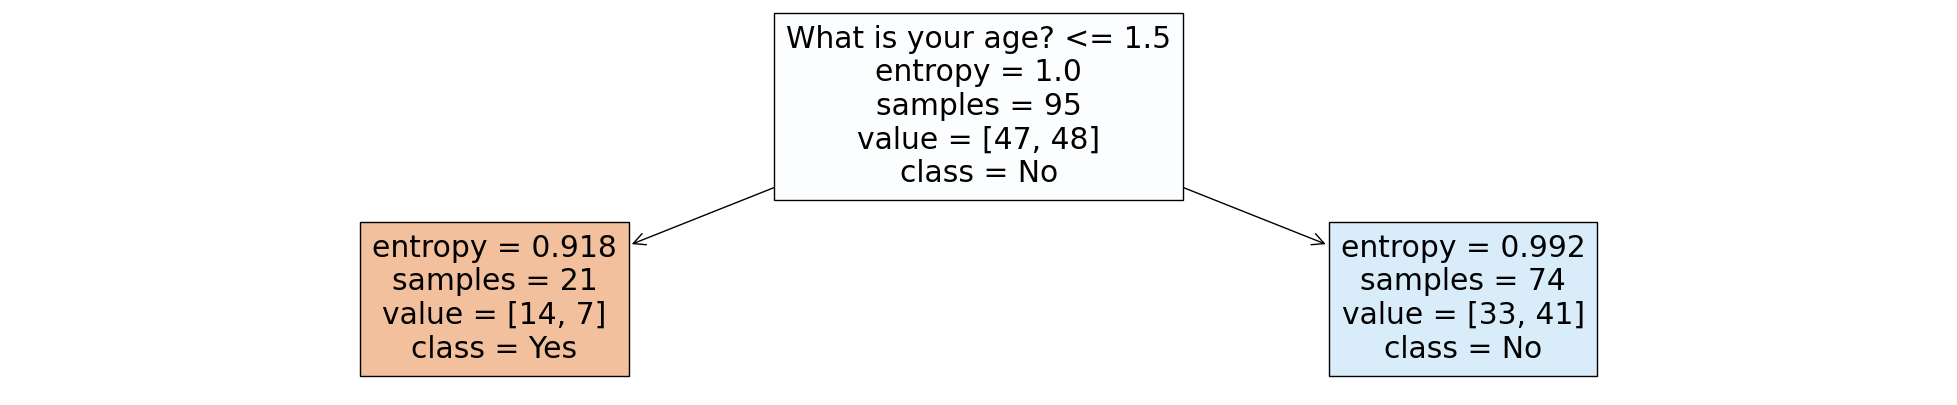

,Aim,Aim_resp,filter1,Condition,Condition_resp,Threshold,filter2
0,3,Yes,50.0,7,No,1.5,23.0
1,4,Yes,48.0,1,Under 18,1.5,14.0


Processing aim: Question 4: Do you plan to use public transportation more frequently?


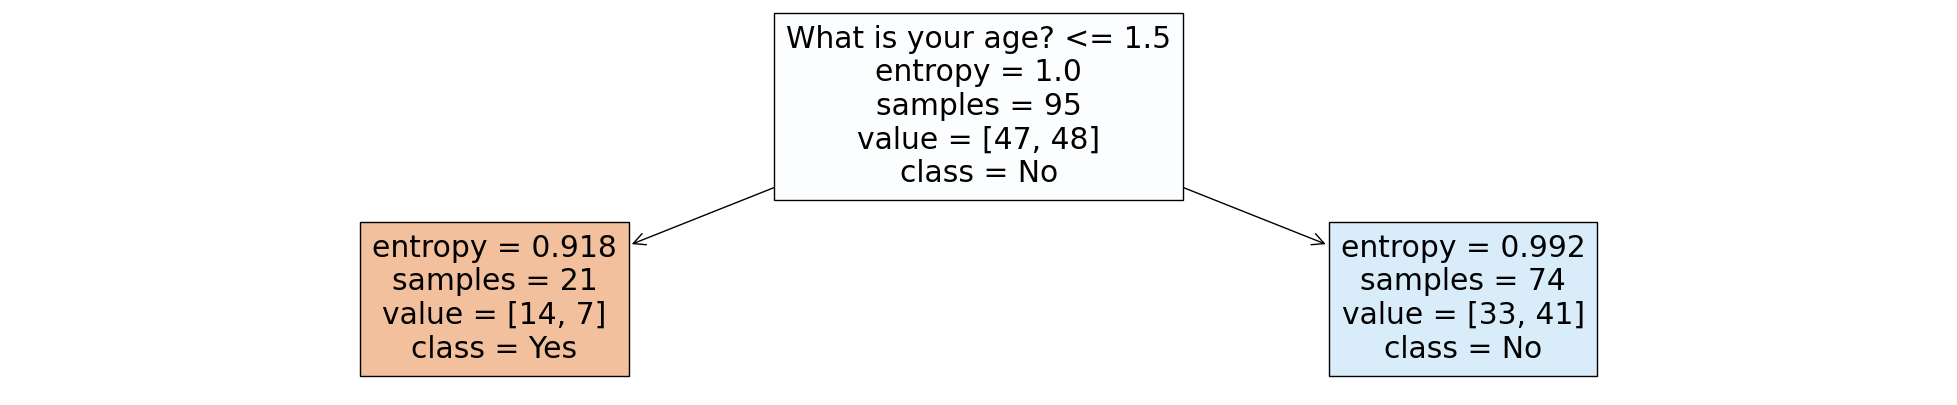

,Aim,Aim_resp,filter1,Condition,Condition_resp,Threshold,filter2
0,3,Yes,50.0,7,No,1.5,23.0
1,4,Yes,48.0,1,Under 18,1.5,14.0


Processing aim: Question 5: Did you vote in the last election?


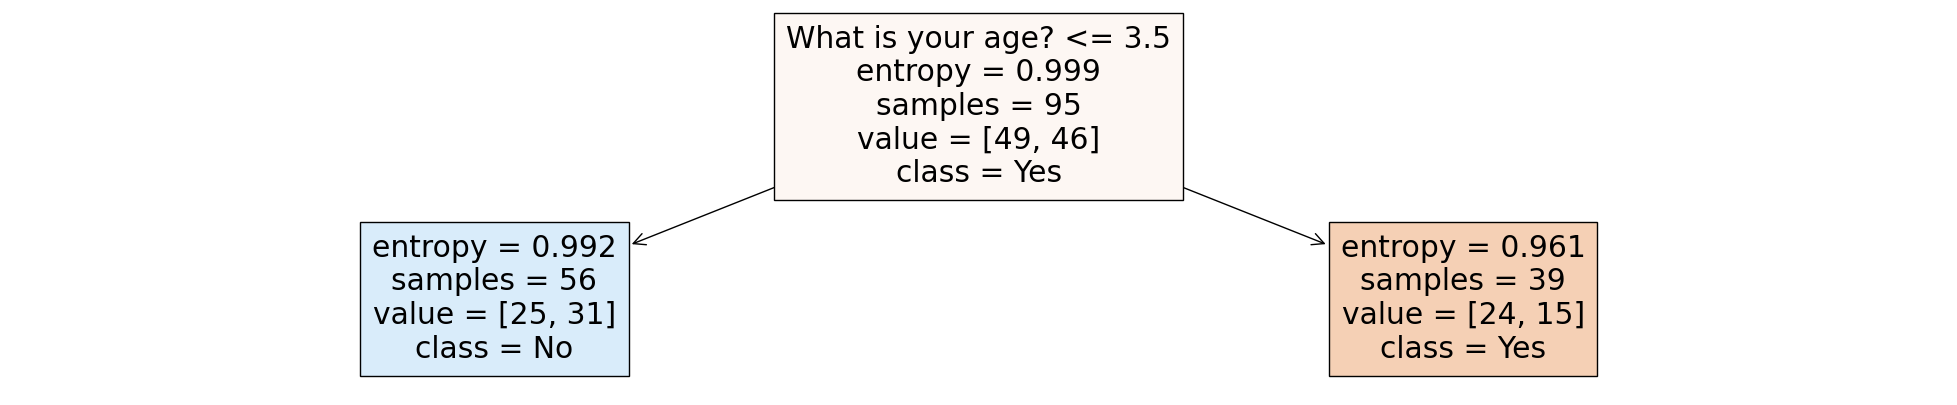

,Aim,Aim_resp,filter1,Condition,Condition_resp,Threshold,filter2
0,3,Yes,50.0,7,No,1.5,23.0
1,4,Yes,48.0,1,Under 18,1.5,14.0
2,5,Yes,49.0,1,"51-65, Over 65",3.5,24.0


Processing aim: Question 5: Did you vote in the last election?


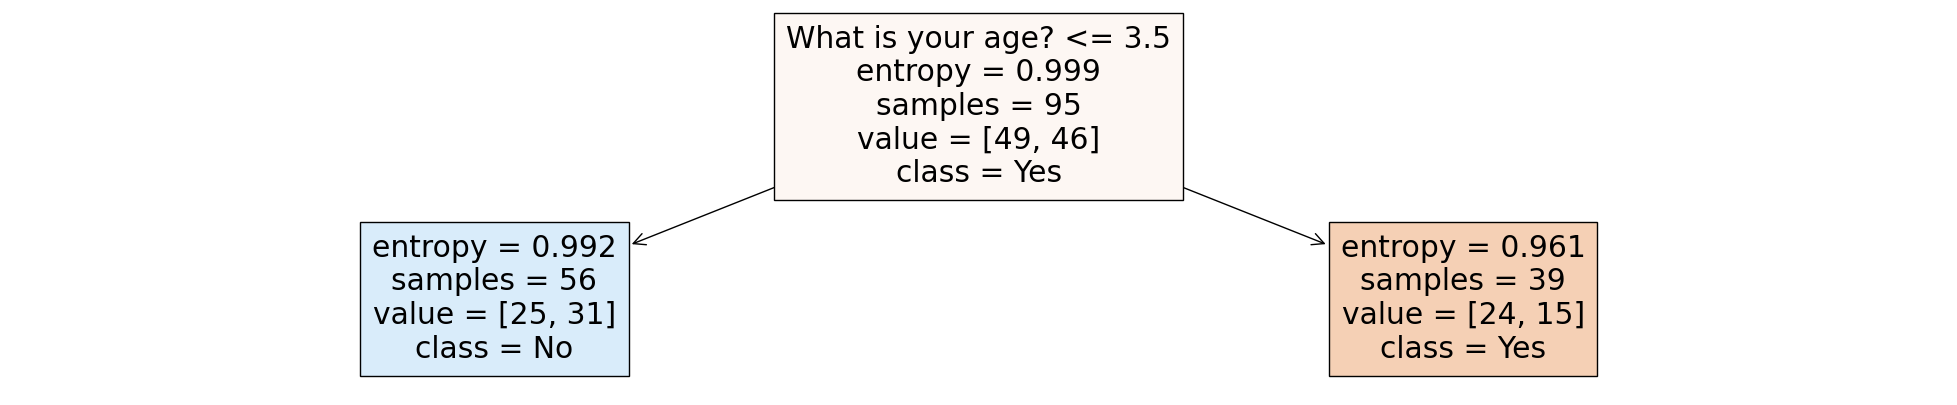

,Aim,Aim_resp,filter1,Condition,Condition_resp,Threshold,filter2
0,3,Yes,50.0,7,No,1.5,23.0
1,4,Yes,48.0,1,Under 18,1.5,14.0
2,5,Yes,49.0,1,"51-65, Over 65",3.5,24.0


Processing aim: Question 5: Did you vote in the last election?


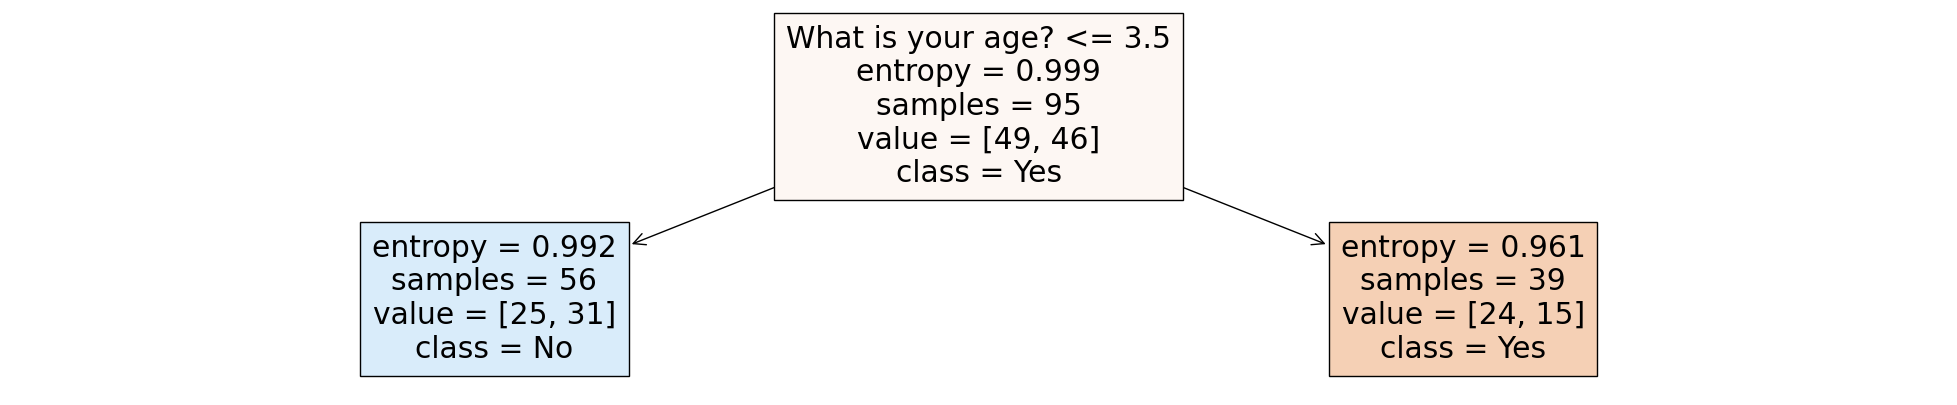

,Aim,Aim_resp,filter1,Condition,Condition_resp,Threshold,filter2
0,3,Yes,50.0,7,No,1.5,23.0
1,4,Yes,48.0,1,Under 18,1.5,14.0
2,5,Yes,49.0,1,"51-65, Over 65",3.5,24.0


In [102]:
statement_questions = pd.DataFrame(columns = ['Aim', 'Aim_resp', 'filter1', 'Condition', 'Condition_resp', 'Threshold', 'filter2'])
random_states = [12, 87, 25]

for aim in aims:
    for r_state in random_states:
        
        # Find the relevant row and value labels
        aimRow = Survey_Overview[Survey_Overview["Question_ID"] == aim]
        aimRow0 = str(aimRow.at[aimRow.index[0], "Response_Option"])
        aimRow1 = str(aimRow.at[aimRow.index[-1], "Response_Option"])
        classes = [aimRow0,aimRow1]

        print(f"Processing aim: Question {aim}: {str(aimRow.at[aimRow.index[0], 'Question_Text'])}")
        
        # Split the data
        X = Survey_Responses.loc[:, ~Survey_Responses.columns.isin(aims.astype(str))].values
        Y = Survey_Responses.loc[:, str(aim)].values

        # Train/test split and decision tree classifier
        X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.05, random_state=100)
        clf_entropy = DecisionTreeClassifier(criterion='entropy', random_state=r_state, max_depth=1, min_samples_leaf=5)
        clf_entropy.fit(X_train, y_train)

        #Get a list of Question_Texts for all the condtions we test
        features = Survey_Responses.loc[:, ~Survey_Responses.columns.isin(aims.astype(str))].columns
        feature_descs = [Survey_Overview[Survey_Overview["Question_ID"] == int(feature)]['Question_Text'].iat[0] for feature in features]
        
        
        # Visualize the decision tree
        plt.figure(figsize=(25, 5))
        plot_tree(clf_entropy, filled=True, feature_names=feature_descs, class_names=classes)
        plt.show()

        # 'clf_entropy' is your trained decision tree classifier
        tree = clf_entropy.tree_

        condition = Survey_Responses.loc[:, ~Survey_Responses.columns.isin(aims.astype(str))].columns[tree.feature[0]]   # Get the condition used for the root node
        threshold = tree.threshold[0]  # get the threshold used on the root node
        
        Survey_Overview['Response_Option'] = Survey_Overview['Response_Option'].astype(str)
        #Rows of question data for this condition
        condition_rows = Survey_Overview[Survey_Overview['Question_ID'] == int(condition)]

        # Retrieve the class counts at the root node
        root_class_counts = tree.value[0][0]  # Gets the counts for each class

        # Find the majority class at the root node
        root_class_maxcount = root_class_counts[np.argmax(root_class_counts)]

        # Identify leaf nodes (where feature is -2)
        leaf_indices = np.where(tree.feature == -2)

        # Find the leaf with the least impurity (entropy)
        least_entropy_leaf_index = leaf_indices[0][np.argmin(tree.impurity[leaf_indices])]


        leaf_is_left = tree.threshold[least_entropy_leaf_index - 1] == threshold  # Determine if the leaf is on the "left"

        # Set 'in_thresh' based on whether the condition is met (leaf is within the threshold)
        if leaf_is_left:
            in_thresh = 0  # The leaf meets the threshold
            condition_rows_of_leaf = condition_rows[condition_rows['Response_Value'] <= threshold]['Response_Option']
        else:
            in_thresh = -1  # The leaf does not meet the threshold (falls outside the threshold)
            condition_rows_of_leaf = condition_rows[condition_rows['Response_Value'] > threshold]['Response_Option']
            if "implementation" in condition: condition_rows_of_leaf = [condition_rows_of_leaf.iloc[-1]]
         

        # Get the majority class for the leaf with the least impurity
        majority_class_index = np.argmax(tree.value[least_entropy_leaf_index])
        majority_class_count = tree.value[least_entropy_leaf_index][0, majority_class_index]

        # You can also retrieve the impurity and class distribution at this leaf
        # least_entropy = tree.impurity[least_entropy_leaf_index]
        # class_distribution = tree.value[least_entropy_leaf_index]

        # Filter data for those meeting the condition
        condition_column = Survey_Responses[condition]
        filter1_count = len(Y[Y == y_train[0]])  # Sample size for those with the lowest entropy class
        filter2_count = len(condition_column[condition_column <= threshold])  # Sample size within the threshold
        
        condition_rows = Survey_Overview[Survey_Overview['Question_ID'] == condition]

        # Create a new row with specified values
        new_row = {
            'Aim': aim,
            'Aim_resp': classes[majority_class_index],  # Class with the lowest entropy
            'filter1': root_class_maxcount,
            'Condition': int(condition),
            'Condition_resp': ", ".join(condition_rows_of_leaf),
            'Threshold': threshold,
            'filter2': majority_class_count
        }
        # Using a new index to add a row directly
        ind = len(statement_questions)  # Determine the next index
        statement_questions.loc[ind] = new_row

        # Drop duplicates if needed
        statement_questions = statement_questions.drop_duplicates()
        display(statement_questions, )


# Save the DataFrame to a CSV file
statement_questions.to_csv("tree_selected_statements.csv", index=False)

In [105]:
statlist = []
models = ["gemma-7b-it", "llama3-8b-8192", "mixtral-8x7b-32768", "llama3-70b-8192"]
llm = ChatGroq(temperature=0, model=models[0], api_key=groqkey)

def ExampleCompletionFunction(request):
    system = """You are a text editor that changes survey questions and answers into behaviour description statements.
                in the form of: "People do action x if y condition is met"
                """
    human = "{text}"
    prompt  = ChatPromptTemplate.from_messages([("system", system), ("human", human)])

    chain = prompt | llm
    response = chain.invoke({"text": request})
    return response.content

for row in statement_questions.index:
    print("")
    aimRow = Survey_Overview[Survey_Overview["Question_ID"] == statement_questions.at[row, "Aim"]]
    conditionRow = Survey_Overview[Survey_Overview["Question_ID"] == statement_questions.at[row, "Condition"]]
    
    print("Out of",len(Survey_Responses),"survey responses,", int(statement_questions.at[row, 'filter1']), "responded with:", statement_questions.at[row, 'Aim_resp'],  "to:", str(aimRow.at[aimRow.index[0], 'Question_Text']))
    print(int(statement_questions.at[row, 'filter2']), "of those people responded:", statement_questions.at[row, 'Condition_resp'],  "to:", str(conditionRow.at[conditionRow.index[0], 'Question_Text']))
    
    aim_cond_stat = f"""Action question: {str(aimRow.at[aimRow.index[0], 'Question_Text'])}
                        response: {statement_questions.at[row, 'Aim_resp']}
                        Condition question: {conditionRow.at[conditionRow.index[0], 'Question_Text']}
                        response: {statement_questions.at[row, 'Condition_resp']}                        
                        """

    IG_Statement = ExampleCompletionFunction(aim_cond_stat)
    print(IG_Statement)
    statlist.append(IG_Statement)
    


Out of 100 survey responses, 50 responded with: Yes to: Have you recycled in the past month?
23 of those people responded: No to: Would you use public transport if it were cheaper?
**Behaviour Description Statement:**

"People recycle if public transport becomes cheaper."

Out of 100 survey responses, 48 responded with: Yes to: Do you plan to use public transportation more frequently?
14 of those people responded: Under 18 to: What is your age?
**Behaviour Description Statement:**

**People under 18 plan to use public transportation more frequently if their age is under 18.**

Out of 100 survey responses, 49 responded with: Yes to: Did you vote in the last election?
24 of those people responded: 51-65, Over 65 to: What is your age?
**Behaviour Description Statement:**

"People between the ages of 51-65 or over 65 who voted in the last election did so because their age met the eligibility criteria for voting."
